<a href="https://colab.research.google.com/github/olcaykursun/ML/blob/main/Spring25/kmeans_example_convergence_inertia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

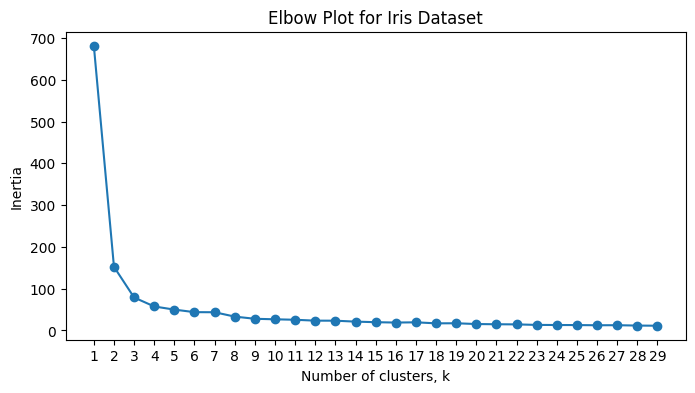

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Range of k values
ks = range(1, 30)
inertias = []

# Compute inertias for different k values
for k in ks:
    model = KMeans(n_clusters=k, n_init=1)
    model.fit(X)
    inertias.append(model.inertia_)

# Plotting the inertias to visualize the elbow method
plt.figure(figsize=(8, 4))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Plot for Iris Dataset')
plt.xticks(ks)
plt.show()


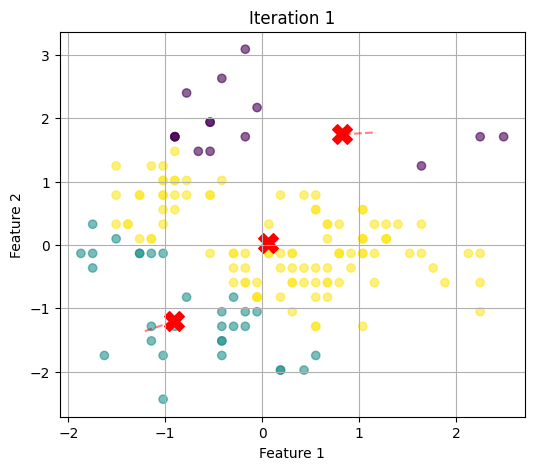

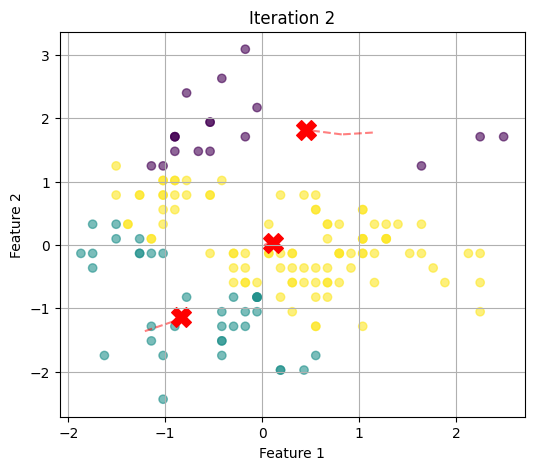

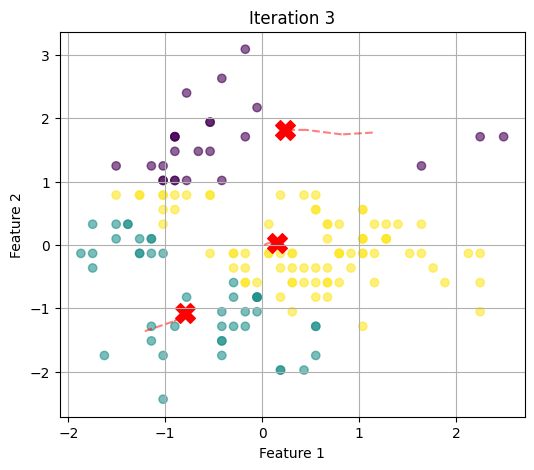

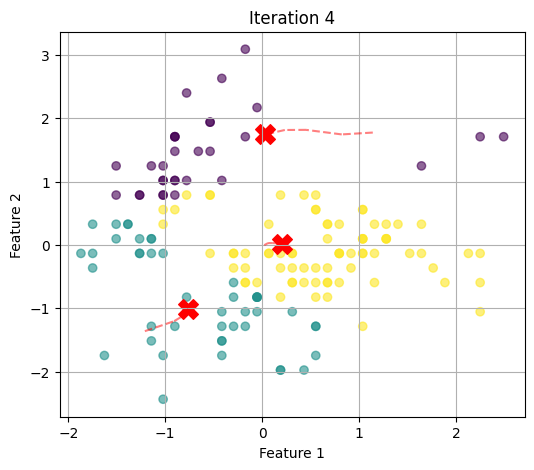

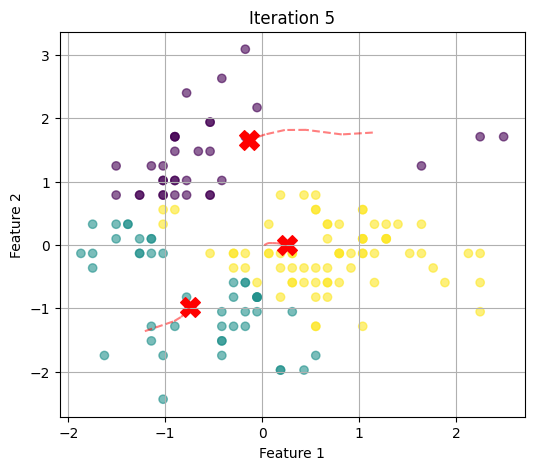

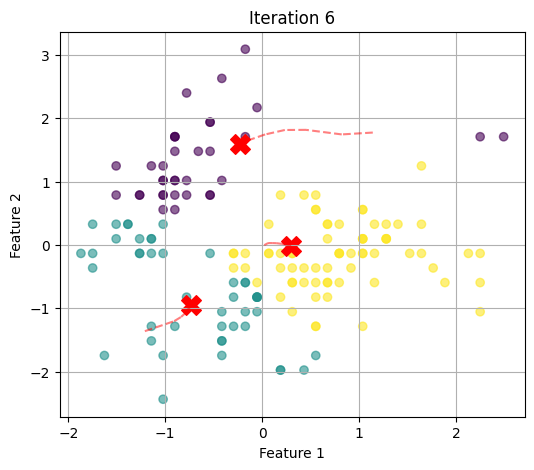

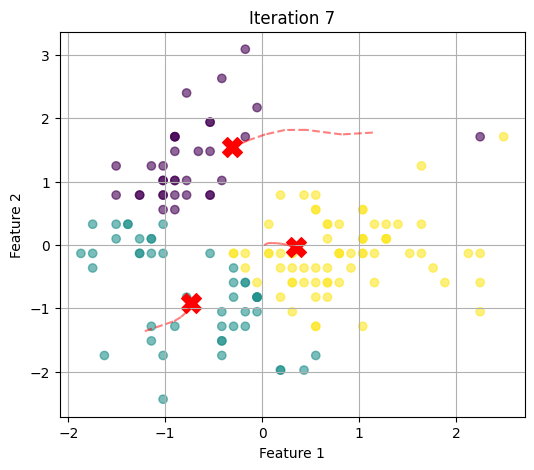

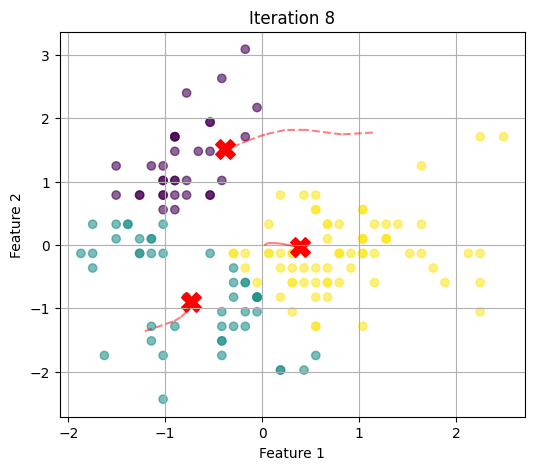

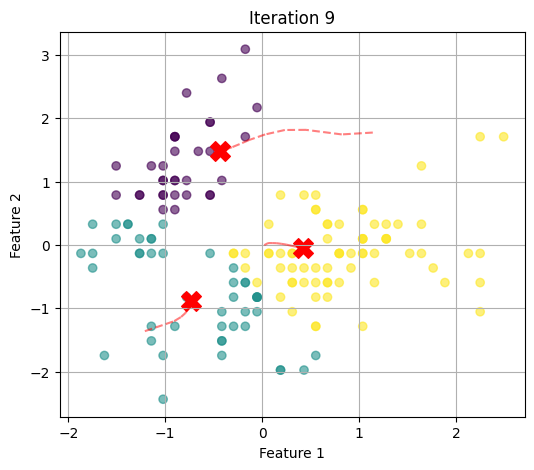

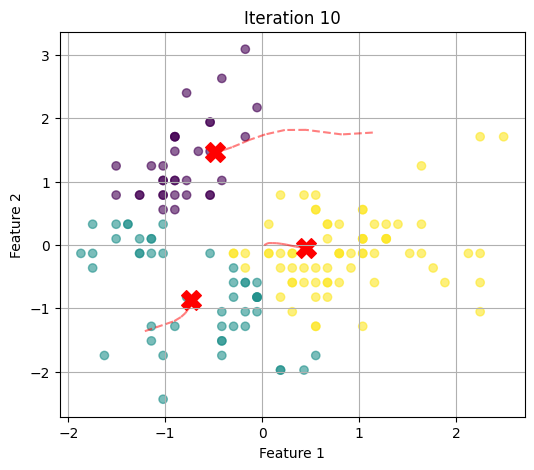

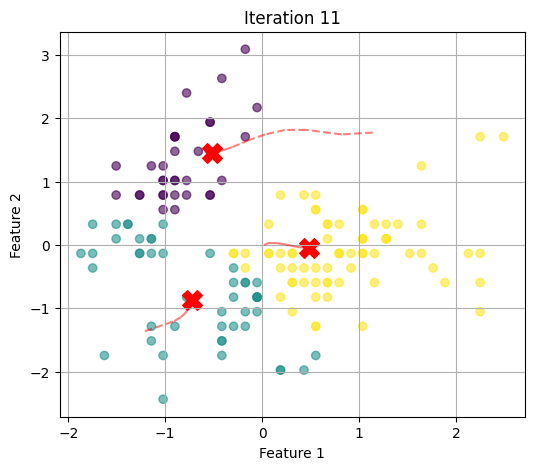

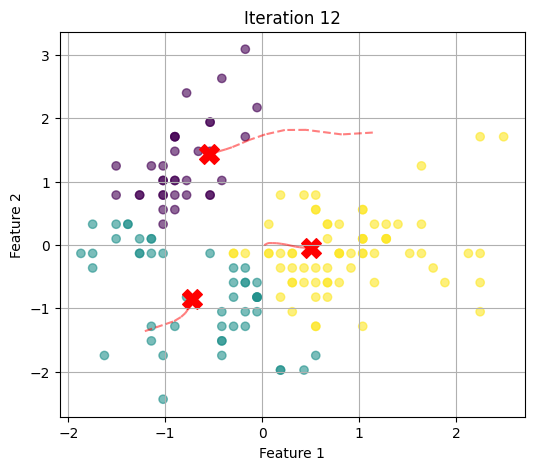

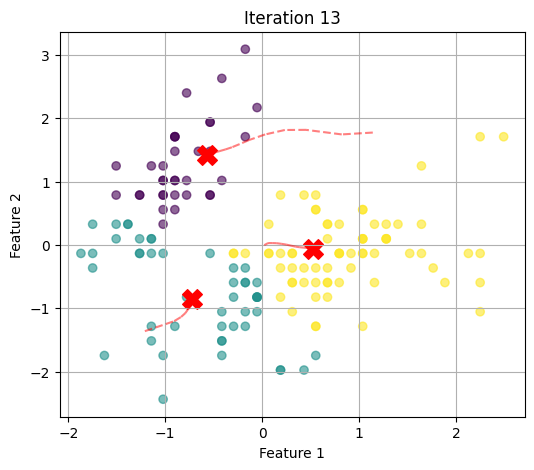

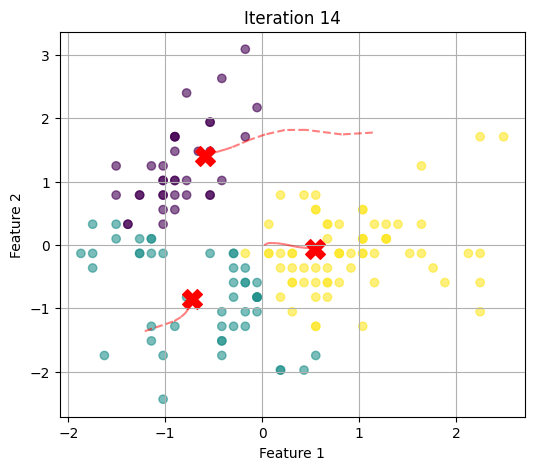

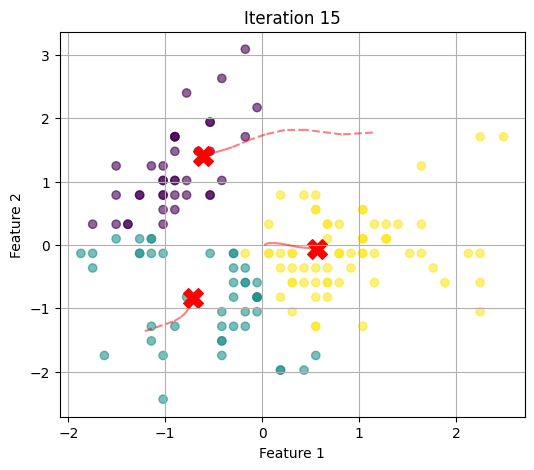

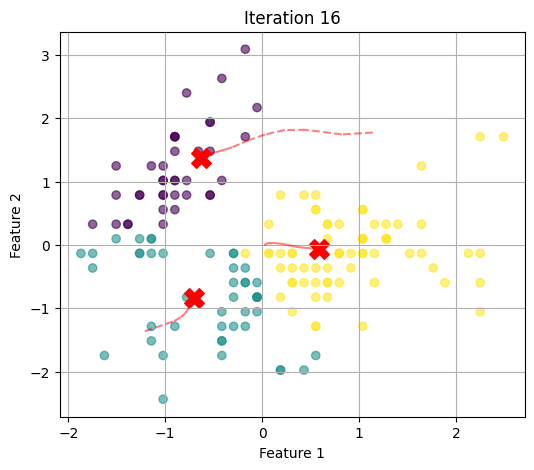

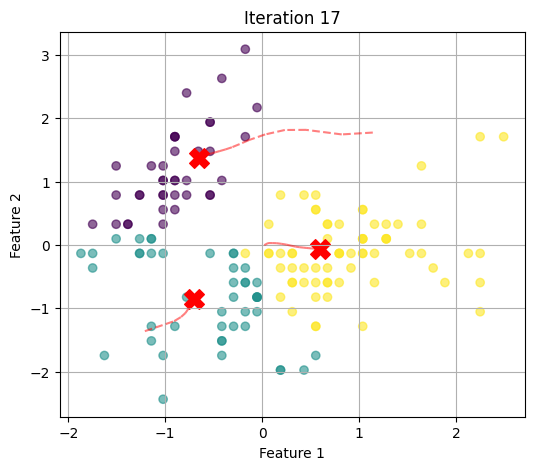

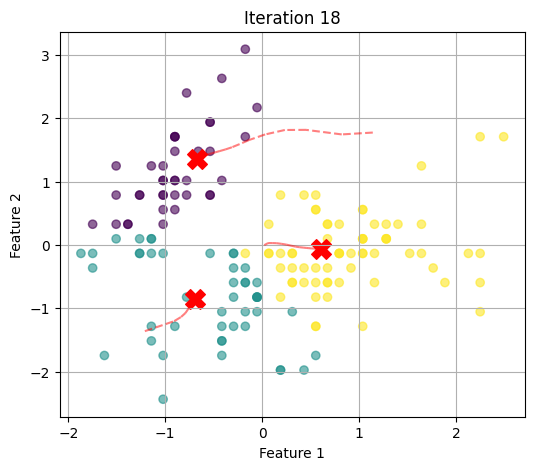

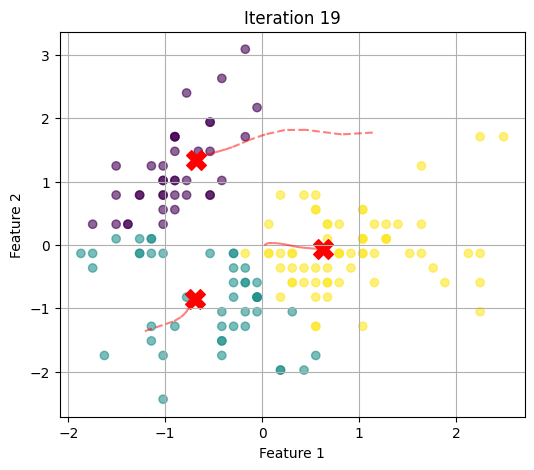

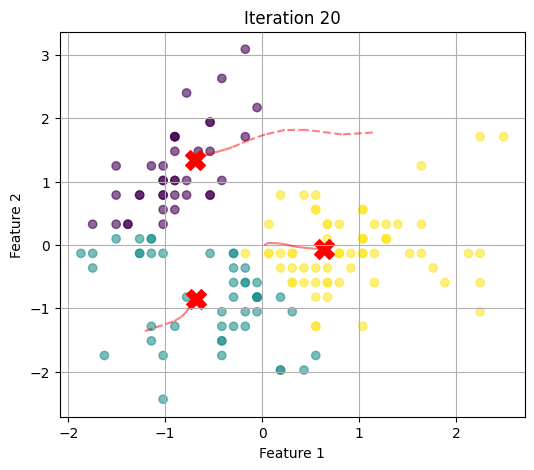

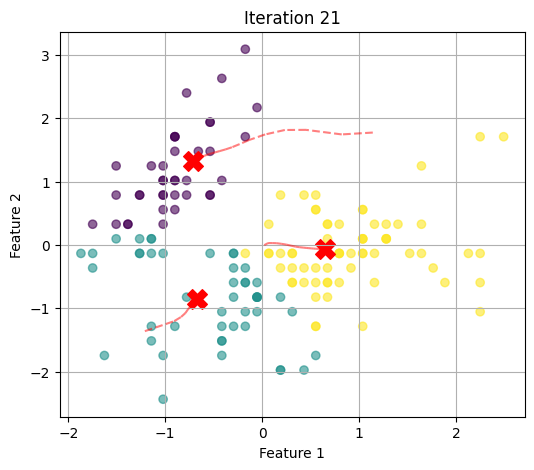

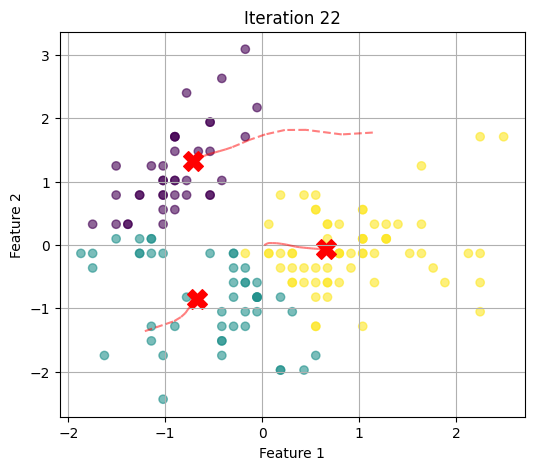

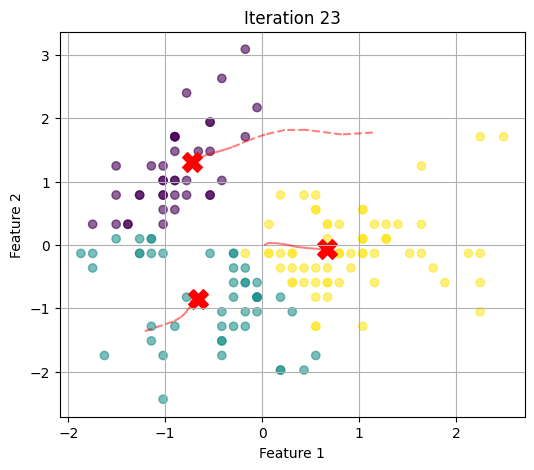

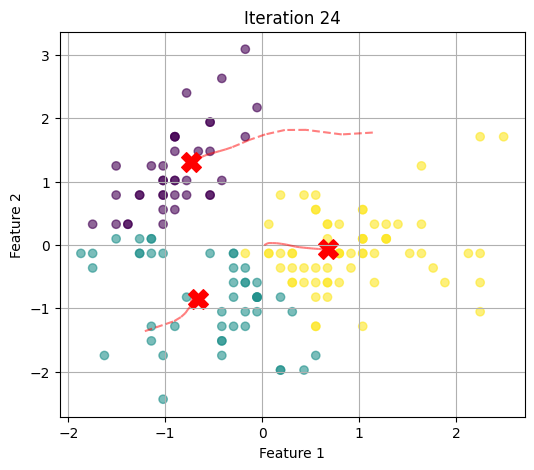

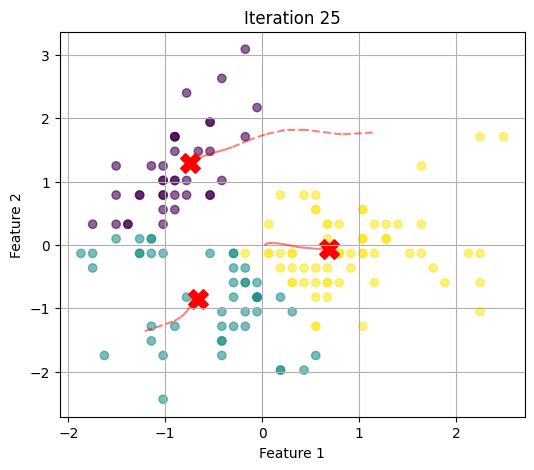

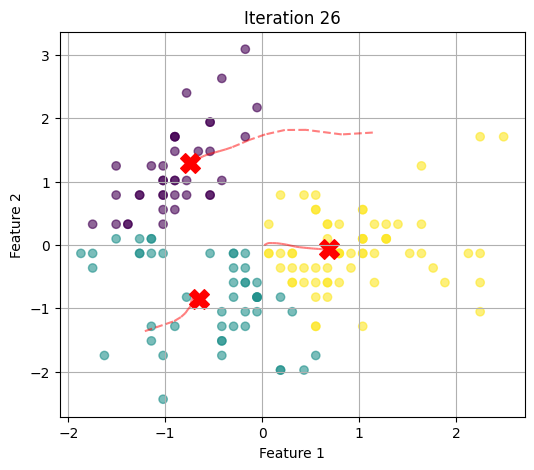

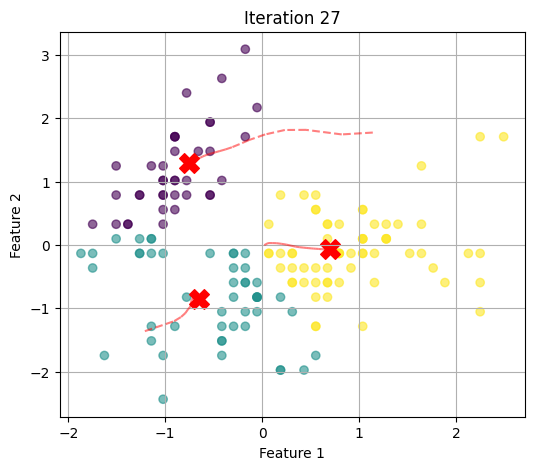

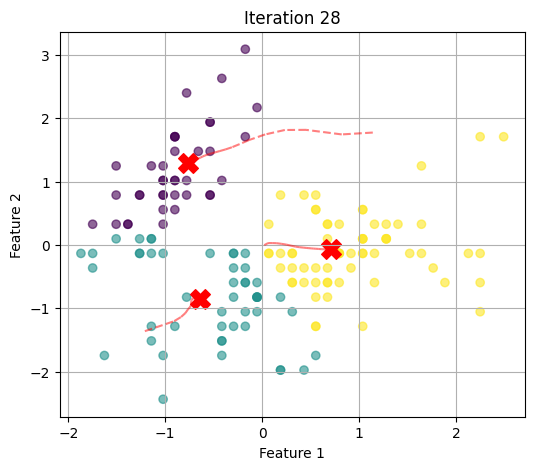

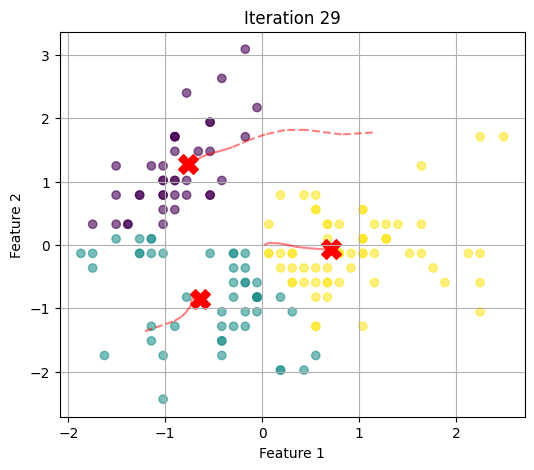

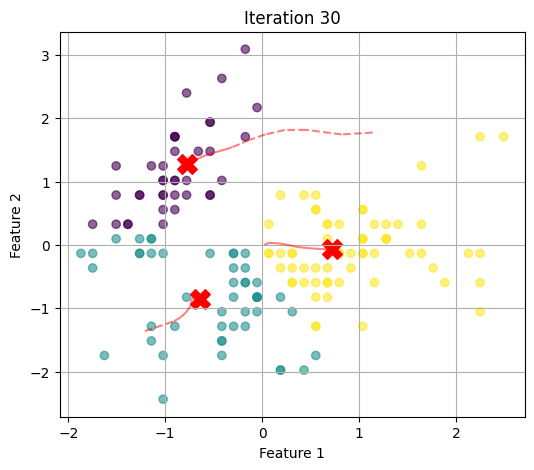

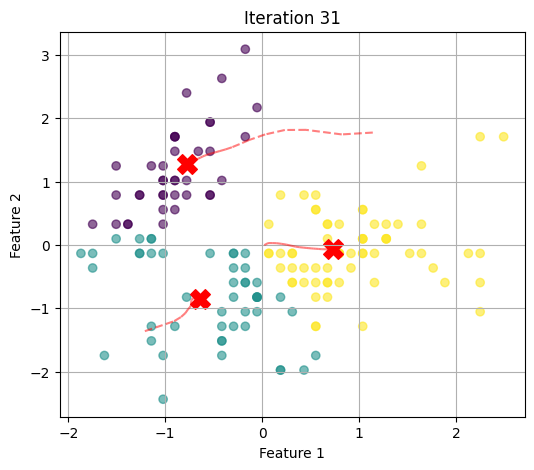

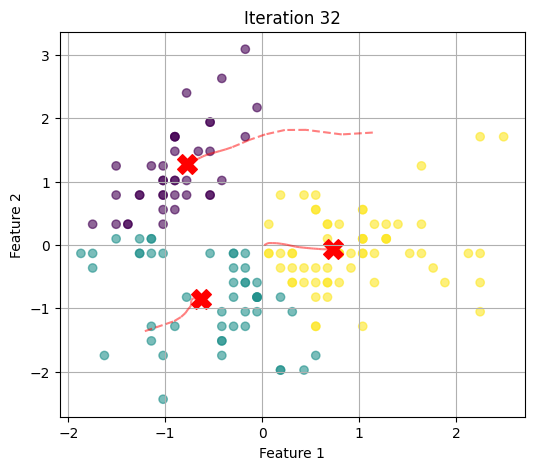

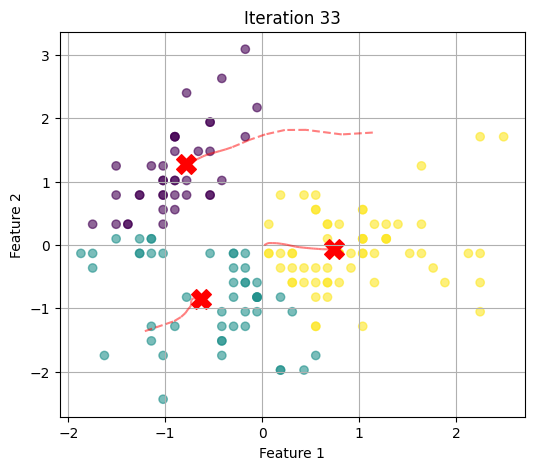

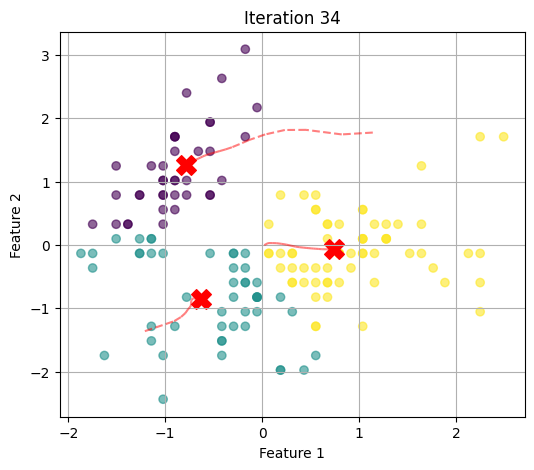

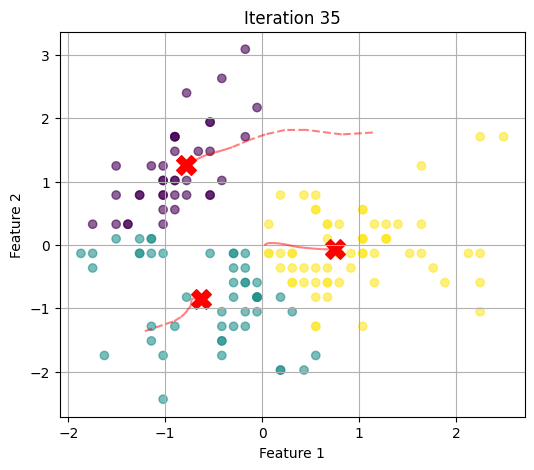

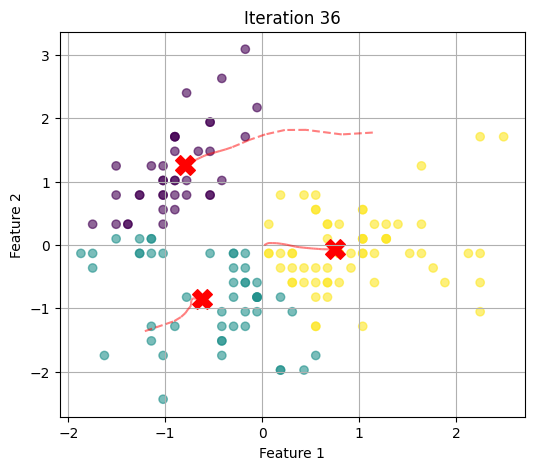

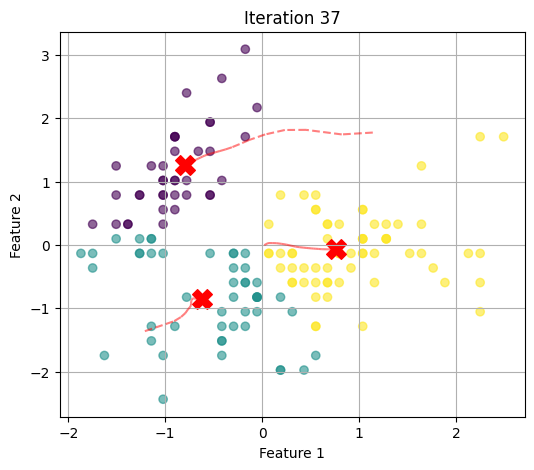

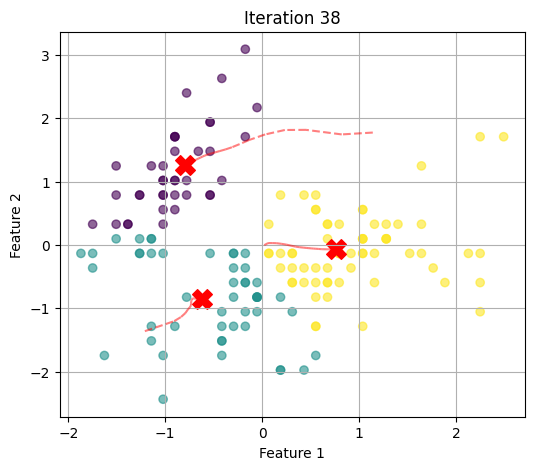

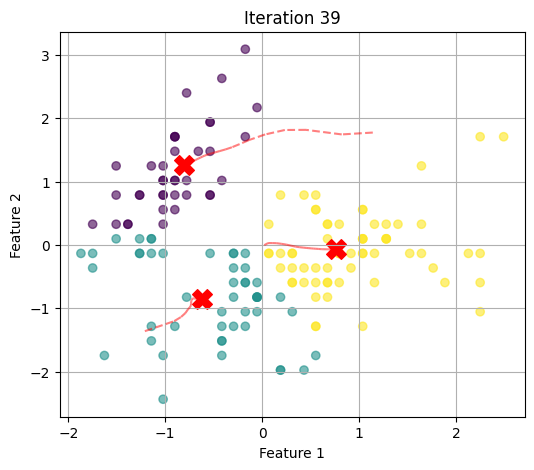

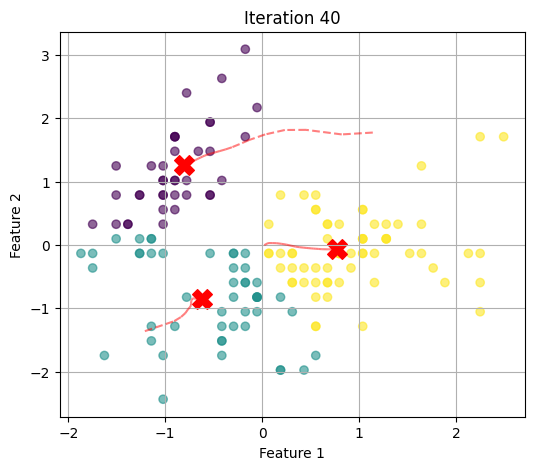

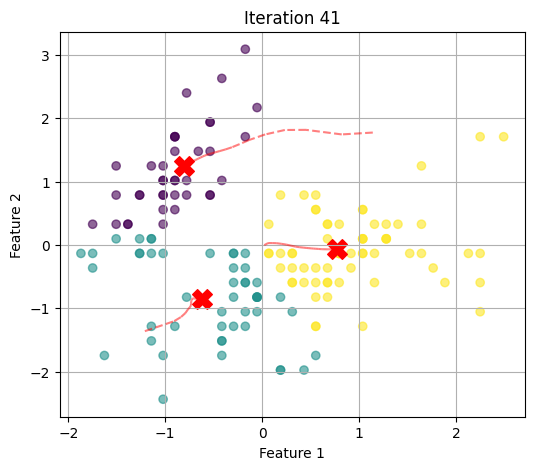

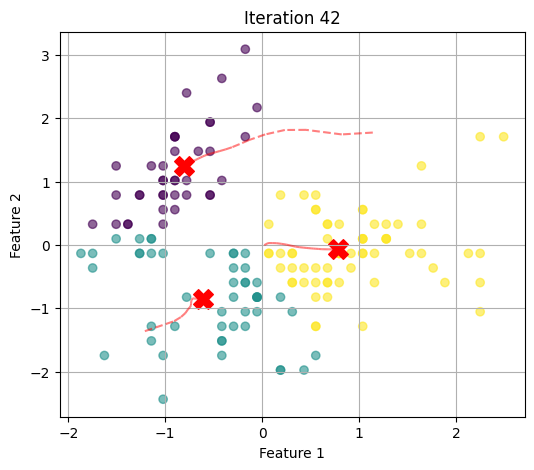

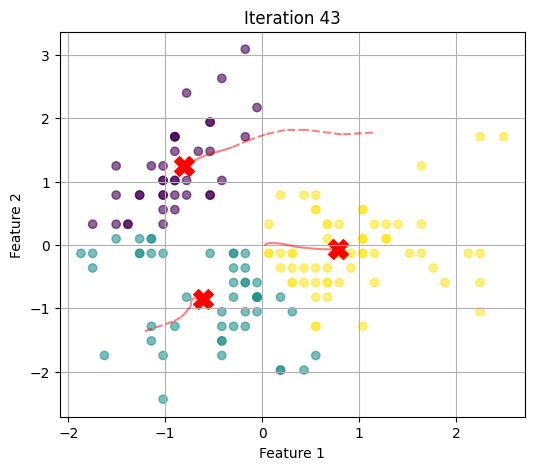

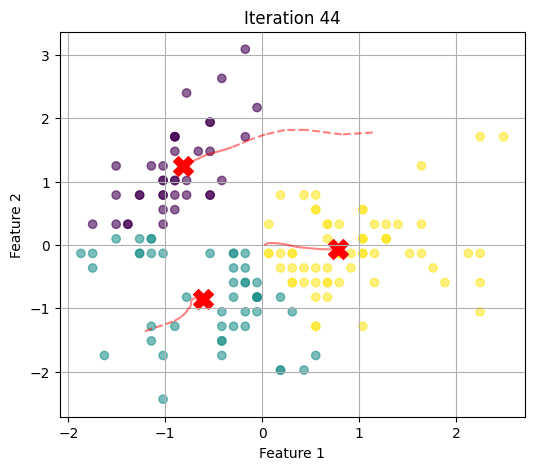

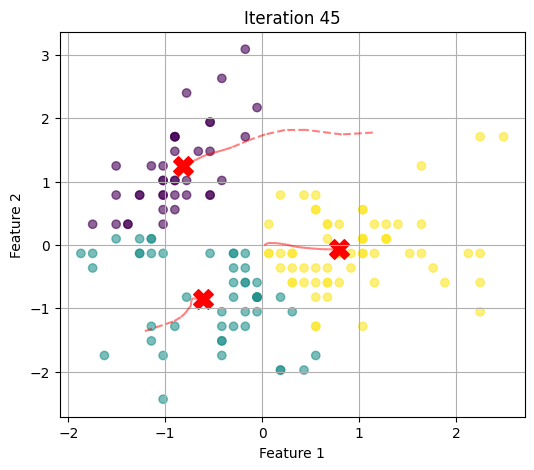

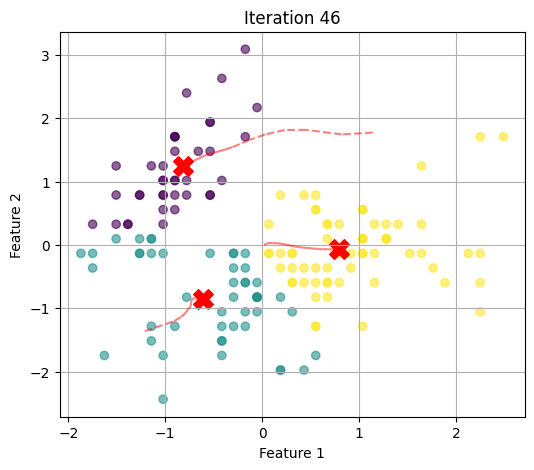

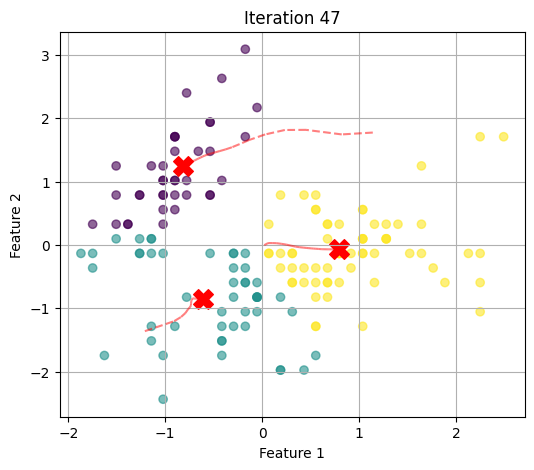

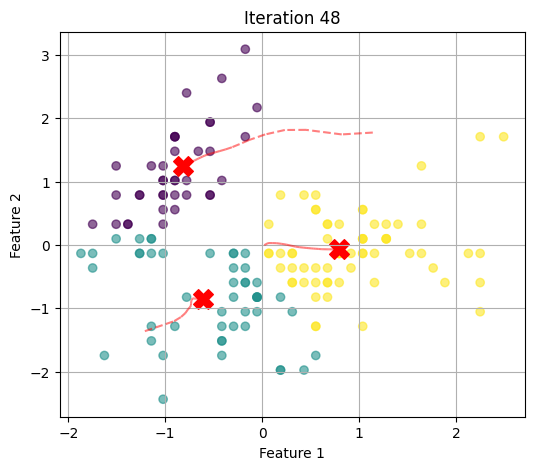

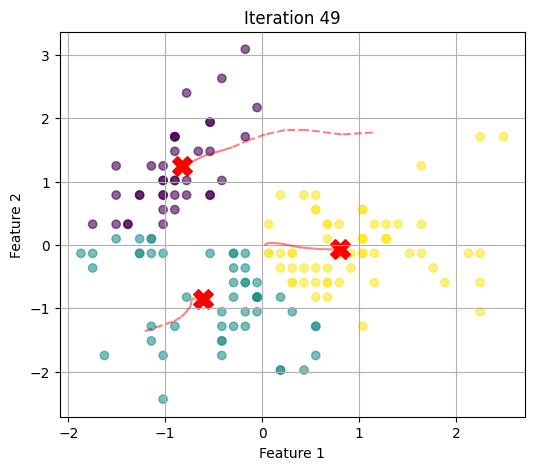

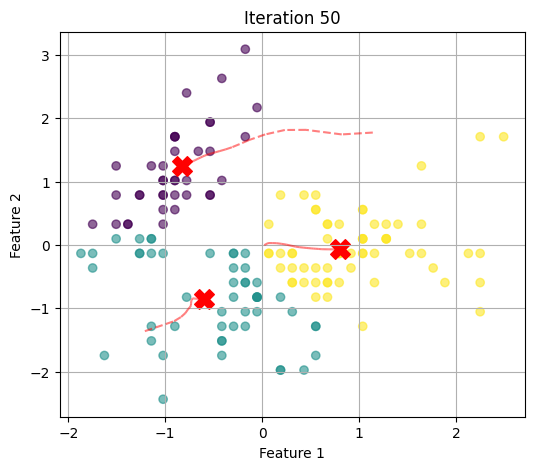

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans

# Load and standardize the Iris dataset
iris = load_iris()
X = StandardScaler().fit_transform(iris.data)
X_2d = X[:, :2]  # Visualize only 2 features

# Set up MiniBatchKMeans
k = 3

# mbk = MiniBatchKMeans(n_clusters=k, n_init=1, batch_size=20, max_iter=1, random_state=42)
# Instead, let's pick arbitrary initial centers, e.g., from edge cases of the data
init_centers = np.array([[2, 2], [-2, -2], [0, 0]])  # Must match shape (k, n_features)

mbk = MiniBatchKMeans(n_clusters=3, init=init_centers, n_init=1,
                      max_iter=1, batch_size=5, random_state=42)

# Initial partial fit
mbk.partial_fit(X_2d)
centers = [mbk.cluster_centers_.copy()]

# Perform iterative learning
n_steps = 50
for i in range(n_steps):
    mbk.partial_fit(X_2d)
    centers.append(mbk.cluster_centers_.copy())

    # Plot current state
    plt.figure(figsize=(6, 5))
    labels = mbk.predict(X_2d)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', alpha=0.6)
    for j in range(len(centers) - 1):
        for c in range(k):  # c is the cluster index
            plt.plot([centers[j][c][0], centers[j+1][c][0]],
                    [centers[j][c][1], centers[j+1][c][1]], 'r--', alpha=0.5)
    plt.scatter(mbk.cluster_centers_[:, 0], mbk.cluster_centers_[:, 1], c='red', s=200, marker='X')
    plt.title(f'Iteration {i+1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()
